In [1]:
import spacy
import textacy
import textacy.preprocessing
import textacy.resources
#import textacy.keyterms
#import textacy.ke
#import neuralcoref
from spacy.symbols import ORTH, POS, NOUN, VERB,PRON
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt 
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from networkx.readwrite import json_graph;
import json
from afinn import Afinn
afn = Afinn()
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
lemmatizer = WordNetLemmatizer()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from sentistrength import PySentiStr
senti = PySentiStr()
senti.setSentiStrengthPath('D:/github/causal-graph-acquisition/SentiStrengthCom.jar')
senti.setSentiStrengthLanguageFolderPath('D:/github/causal-graph-acquisition/SentStrength_Data_Sept2011/')
import pandas as pd
from IPython.display import display
import collections
from pd_replicator import replicator

from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
MODEL = f"cardiffnlp/twitter-xlm-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
#model.save_pretrained(MODEL)

# from allennlp_models.pretrained import load_predictor
# predictor = load_predictor("roberta-sst")
# predictor = load_predictor("glove-sst")

# from transformers import pipeline 
# MODEL = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
# #semtiment_pipeline = pipeline("sentiment-analysis", model='cardiffnlp/twitter-roberta-base-sentiment-latest')
# semtiment_pipeline = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

from nltk.corpus import stopwords
set(stopwords.words('english'))

from nltk.stem import PorterStemmer
ps = PorterStemmer()

nlp = spacy.load("en_core_web_sm")
#neuralcoref.add_to_pipe(nlp)

import inflect
m = inflect.engine()
from lemminflect import getInflection

from scipy.special import kl_div

import pysmile
pysmile.License((
	b"SMILE LICENSE ecfef270 bc4cc695 4af8e89c "
	b"THIS IS AN ACADEMIC LICENSE AND CAN BE USED "
	b"SOLELY FOR ACADEMIC RESEARCH AND TEACHING, "
	b"AS DEFINED IN THE BAYESFUSION ACADEMIC "
	b"SOFTWARE LICENSING AGREEMENT. "
	b"Serial #: 2t0e11fqti66adbwtenm32onh "
	b"Issued for: Solat Jabeen (solatjabeen@yahoo.com) "
	b"Academic institution: Institute of Business Administration "
	b"Valid until: 2026-02-25 "
	b"Issued by BayesFusion activation server"
	),[
	0xec,0x48,0xc9,0xed,0x54,0x25,0x35,0x78,0xd9,0xa9,0xdf,0xf5,0xf6,0x85,0x76,0xa5,
	0x65,0x76,0xf2,0x71,0x20,0x9a,0x50,0xe5,0x16,0x57,0xfc,0x30,0x9d,0x96,0xcd,0x28,
	0x87,0x8a,0x81,0xed,0xc1,0x7b,0x72,0x2e,0x09,0xf0,0xd1,0x56,0xdb,0x06,0x21,0xed,
	0x18,0x06,0xb6,0x94,0xee,0xab,0xa8,0xaa,0x2d,0xa0,0xb7,0x0e,0x6a,0x11,0xbf,0x12])

In [2]:
simplifiedSents = [
'inflation is easing.',
'lowered oil prices ease inflation.',
'lowered commodity prices ease inflation.',
'the rbi has been able to reduce interest rates.',
'further rate cuts remain possible.',
'reduced interest rates positively impacts auto sector demand environment.',
'reduced interest rates improve economic climate.',
'reduced interest rates improve consumer sentiment.', 

'rising rents have pressured inflation.',
'rising healthcare expenses have pressured inflation.',

'rising oil prices elevate inflation.',
'reduced food prices tend to ease inflation.',
'rising oil prices adversely affect emerging markets.',
'rising oil prices increase fuel costs in emerging markets.',
'fuel costs have shaped inflation.',
'rising oil prices increase inflation in emerging markets.',
'rising oil prices interact with weaker currencies.',
'rising oil prices interact with higher import costs.',
'rising oil prices slow economic activity in emerging markets.',
'central banks policy measures influence inflation.',

'labor market tightening creates wage pressures.',
'wage pressures cause higher unit labor costs.',
'higher unit labor costs increases inflation.',

'foreign currency restrictions create exchange rate volatility.',
'exchange rate volatility causes import costs fluctuations.',
'import costs fluctuations influence inflation.',

'increased healthcare costs drives higher insurance premiums.',
'higher insurance premiums cause higher business operating costs.',
'higher business operating costs raises inflation.',

'slowing economic activity leads to reduced consumer demand.',
'reduced consumer demand leads to lowered capacity utilization.',
'lowered capacity utilization limits inflation.',

'bangko sentral ng pilipinas (bsp) monitors inflation.',
'strong gdp growth causes increased resource demand.',
'increased resource demand creates supply bottlenecks.',
'supply bottlenecks elevate inflation.',

'analysts caution about increased resource demand.',
'analysts caution about stimulus-driven spending.',
'analysts caution about rising oil prices.',
'increased resource demand forces central banks policy measures.',
'stimulus-driven spending forces central banks policy measures.',
'rising oil prices forces central banks policy measures.',
'central banks policy measures raise reduced interest rates.',
]

In [3]:
sentences2 = [
    "lowered oil prices ease inflation.",
    "lowered commodity prices ease inflation.",
    "reduced interest rates positively impacts auto sector demand environment.",
    "reduced interest rates improve economic climate.",
    "reduced interest rates improve consumer sentiment.",    

'rising rents have pressured inflation.',
'rising healthcare expenses have pressured inflation.',

    "rising oil prices elevate inflation.",
    "rising oil prices adversely affect emerging markets.",
    "rising oil prices increase fuel costs in emerging markets.",

'fuel costs have shaped inflation.',
    
    "rising oil prices increase inflation in emerging markets.",
    "rising oil prices interact with weaker currencies.",
    "rising oil prices interact with higher import costs.",    
    "rising oil prices slow economic activity in emerging markets.",
    "rising oil prices slow economic activity in emerging markets.",    
    "central banks policy measures influence inflation.",

'labor market tightening creates wage pressures.',
'wage pressures cause higher unit labor costs.',
'higher unit labor costs increases inflation.',

'foreign currency restrictions create exchange rate volatility.',
'exchange rate volatility causes import costs fluctuations.',
'import costs fluctuations influence inflation.',

'increased healthcare costs drives higher insurance premiums.',
'higher insurance premiums cause higher business operating costs.',
'higher business operating costs raises inflation.',

'slowing economic activity leads to reduced consumer demand.',
'reduced consumer demand leads to lowered capacity utilization.',
'lowered capacity utilization limits inflation.',

    "bangko sentral ng pilipinas (bsp) monitors inflation.",   

'strong gdp growth causes increased resource demand.',
'increased resource demand creates supply bottlenecks.',
'supply bottlenecks elevate inflation.',

    "analysts caution about increased resource demand.",
    "analysts caution about stimulus-driven spending.",
    "analysts caution about rising oil prices.",
    "increased resource demand forces central banks policy measures.",
    "stimulus-driven spending forces central banks policy measures.",
    "rising oil prices forces central banks policy measures.",
    "central banks policy measures raise reduced interest rates."
]


In [4]:
correctTriples = [
    ('lowered oil prices', 'ease', 'inflation'),
    ('lowered commodity prices', 'ease', 'inflation'),
    ('reduced interest rates', 'positively impacts', 'auto sector demand environment'),
    ('reduced interest rates', 'improve', 'economic climate'),
    ('reduced interest rates', 'improve', 'consumer sentiment'),

('rising rents', 'have pressured', 'inflation'),
('rising healthcare expenses', 'have pressured', 'inflation'),

    ('rising oil prices', 'elevate', 'inflation'),
    ('rising oil prices', 'adversely affect', 'emerging markets'),
    ('rising oil prices', 'increase', 'fuel costs'),

('fuel costs', 'have shaped', 'inflation'),

    ('rising oil prices', 'increase', 'inflation'),
    ('rising oil prices', 'interact', 'weaker currencies'),
    ('rising oil prices', 'interact', 'higher import costs'),
    ('rising oil prices', 'slow', 'economic activity'),
    ('rising oil prices', 'slow', 'emerging markets'),
    ('central banks policy measures', 'influence', 'inflation'),

('labor market tightening', 'creates', 'wage pressures'),
('wage pressures', 'cause', 'higher unit labor costs'),
('higher unit labor costs', 'increase', 'inflation'),

('foreign currency restrictions', 'create', 'exchange rate volatility'),
('exchange rate volatility', 'causes', 'import costs fluctuations'),
('import costs fluctuations', 'influence', 'inflation'),

('increased healthcare costs', 'drives', 'higher insurance premiums'),
('higher insurance premiums', 'cause', 'higher business operating costs'),
('higher business operating costs', 'raises', 'inflation'),

('slowing economic activity', 'leads to', 'reduced consumer demand'),
('reduced consumer demand', 'leads to', 'lowered capacity utilization'),
('lowered capacity utilization', 'limits', 'inflation'),

    ('bangko Sentral ng Pilipinas (BSP)', 'monitors', 'inflation'),

('strong gdp growth', 'causes', 'increased resource demand'),
('increased resource demand', 'creates', 'supply bottlenecks'),
('supply bottlenecks', 'elevate', 'inflation'),

    ('analysts', 'caution', 'increased resource demand'),
    ('analysts', 'caution', 'stimulus-driven spending'),
    ('analysts', 'caution', 'rising oil prices'),
    ('increased resource demand', 'forces', 'central banks policy measures'),
    ('stimulus-driven spending', 'forces', 'central banks policy measures'),
    ('rising oil prices', 'forces', 'central banks policy measures'),
    ('central banks policy measures', 'raise', 'reduced interest rates')
]

Nodes: 34
Edges: 38
lowered oil prices , {'predicate': 'ease'} , inflation
lowered commodity prices , {'predicate': 'ease'} , inflation
reduced interest rates , {'predicate': 'positively impacts'} , auto sector demand environment
reduced interest rates , {'predicate': 'improve'} , economic climate
reduced interest rates , {'predicate': 'improve'} , consumer sentiment
rising rents , {'predicate': 'have pressured'} , inflation
rising healthcare expenses , {'predicate': 'have pressured'} , inflation
rising oil prices , {'predicate': 'increase'} , inflation
rising oil prices , {'predicate': 'slow'} , emerging markets
rising oil prices , {'predicate': 'increase'} , fuel costs
rising oil prices , {'predicate': 'interact'} , weaker currencies
rising oil prices , {'predicate': 'interact'} , higher import costs
rising oil prices , {'predicate': 'slow'} , economic activity
rising oil prices , {'predicate': 'forces'} , central banks policy measures
fuel costs , {'predicate': 'have shaped'} , infl

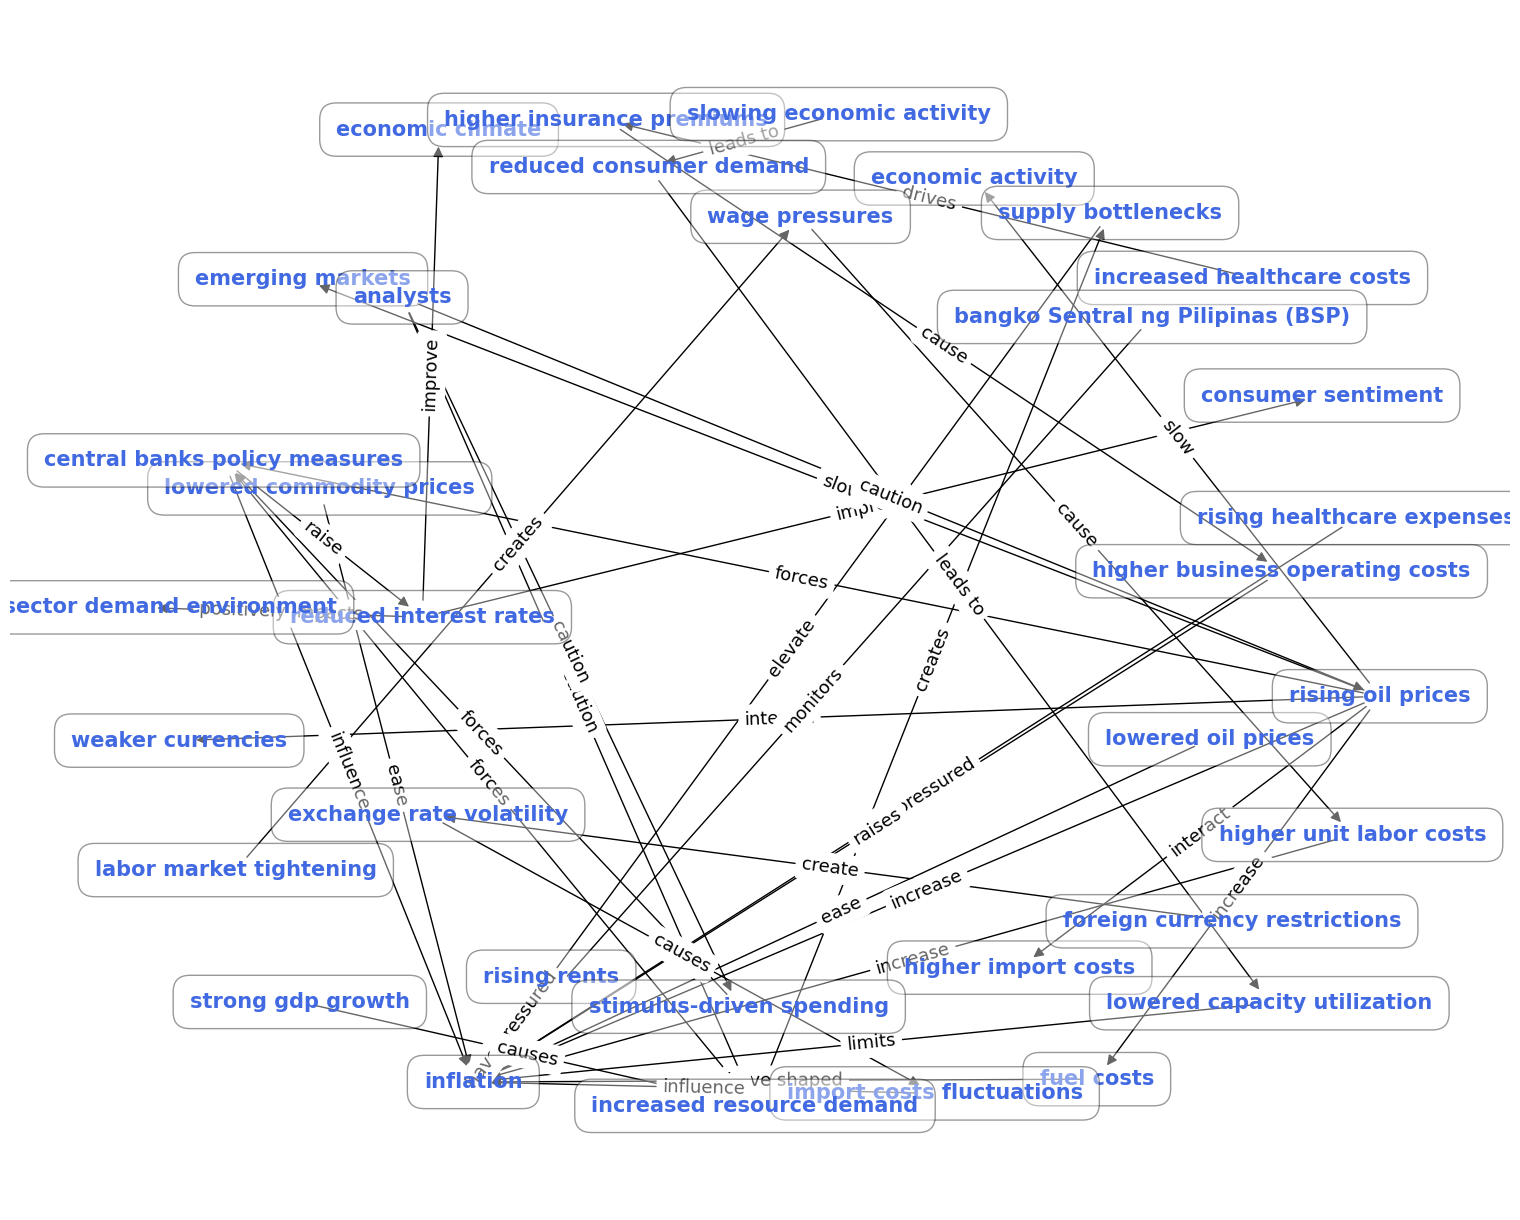

In [6]:
cmap = nx.DiGraph()

for triple in correctTriples:
    s = str(triple[0])    
    d = str(triple[2])
    cmap.add_edge(s, d, predicate=triple[1])
    #print(triple)

print("Nodes:",len(cmap.nodes))
print("Edges:",len(cmap.edges))
for e in cmap.edges(data=True):
    print(e[0],",",e[2],",",e[1])

pos = nx.spring_layout(cmap, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cmap, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cmap.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cmap,'predicate')
nx.draw_networkx_edge_labels(cmap, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

In [7]:
synonyms = []

my_file = open(".\old_dictionary_V2a.txt", "r")
  
data = my_file.read()
  
synonyms = data.split("\n")
#print(data_into_list)
my_file.close()

print(len(synonyms))

3237


In [8]:
causeffect = [] #without duplicates
causalSentences = [] #with duplicates

lemma_function = WordNetLemmatizer()
for s,st in zip(sentences2,correctTriples):
    check = False
    tokens = word_tokenize(str(st[1]))
    for token, tag in pos_tag(tokens):
        tok = token
        lemma = lemma_function.lemmatize(token)
        stem = ps.stem(token)
        
    for synonym in synonyms:
        if synonym == lemma or synonym == tok or synonym == stem or synonym == str(st[1]):
            if len(causeffect) == 0:
                causeffect.append(st)
                causalSentences.append(s)
            else:
                for ct in causeffect:
                    if str(st[0]) == str(ct[0]) and str(st[1]) == str(ct[1]) and str(st[2]) == str(ct[2]):
                        check = True
                        break;
                if check == False:
                    causeffect.append(st)
                    causalSentences.append(s)
            break
    

print(len(causalSentences))
print(len(causeffect))

# for causalSentence in causalSentences:
#     print(causalSentence)

29
29


In [9]:
for j in causeffect:
    print(j)

('reduced interest rates', 'positively impacts', 'auto sector demand environment')
('rising oil prices', 'elevate', 'inflation')
('rising oil prices', 'adversely affect', 'emerging markets')
('rising oil prices', 'increase', 'fuel costs')
('fuel costs', 'have shaped', 'inflation')
('rising oil prices', 'increase', 'inflation')
('central banks policy measures', 'influence', 'inflation')
('labor market tightening', 'creates', 'wage pressures')
('wage pressures', 'cause', 'higher unit labor costs')
('higher unit labor costs', 'increase', 'inflation')
('foreign currency restrictions', 'create', 'exchange rate volatility')
('exchange rate volatility', 'causes', 'import costs fluctuations')
('import costs fluctuations', 'influence', 'inflation')
('increased healthcare costs', 'drives', 'higher insurance premiums')
('higher insurance premiums', 'cause', 'higher business operating costs')
('higher business operating costs', 'raises', 'inflation')
('slowing economic activity', 'leads to', 'redu

In [9]:
for j in causalSentences:
    print(j)

reduced interest rates positively impacts auto sector demand environment.
rising oil prices elevate inflation.
rising oil prices adversely affect emerging markets.
rising oil prices increase fuel costs in emerging markets.
fuel costs have shaped inflation.
rising oil prices increase inflation in emerging markets.
central banks policy measures influence inflation.
labor market tightening creates wage pressures.
wage pressures cause higher unit labor costs.
higher unit labor costs increases inflation.
foreign currency restrictions create exchange rate volatility.
exchange rate volatility causes import costs fluctuations.
import costs fluctuations influence inflation.
increased healthcare costs drives higher insurance premiums.
higher insurance premiums cause higher business operating costs.
higher business operating costs raises inflation.
slowing economic activity leads to reduced consumer demand.
reduced consumer demand leads to lowered capacity utilization.
lowered capacity utilizatio

In [10]:
for causalSentence, causalTriple  in zip(causalSentences, causeffect):
    print(causalSentence, causalTriple)

reduced interest rates positively impacts auto sector demand environment. ('reduced interest rates', 'positively impacts', 'auto sector demand environment')
rising oil prices elevate inflation. ('rising oil prices', 'elevate', 'inflation')
rising oil prices adversely affect emerging markets. ('rising oil prices', 'adversely affect', 'emerging markets')
rising oil prices increase fuel costs in emerging markets. ('rising oil prices', 'increase', 'fuel costs')
fuel costs have shaped inflation. ('fuel costs', 'have shaped', 'inflation')
rising oil prices increase inflation in emerging markets. ('rising oil prices', 'increase', 'inflation')
central banks policy measures influence inflation. ('central banks policy measures', 'influence', 'inflation')
labor market tightening creates wage pressures. ('labor market tightening', 'creates', 'wage pressures')
wage pressures cause higher unit labor costs. ('wage pressures', 'cause', 'higher unit labor costs')
higher unit labor costs increases infla

Nodes: 24
Edges: 28
reduced interest rates , {'predicade': 'positively impacts'} , auto sector demand environment
rising oil prices , {'predicade': 'increase'} , inflation
rising oil prices , {'predicade': 'adversely affect'} , emerging markets
rising oil prices , {'predicade': 'increase'} , fuel costs
rising oil prices , {'predicade': 'forces'} , central banks policy measures
fuel costs , {'predicade': 'have shaped'} , inflation
central banks policy measures , {'predicade': 'influence'} , inflation
central banks policy measures , {'predicade': 'raise'} , reduced interest rates
labor market tightening , {'predicade': 'creates'} , wage pressures
wage pressures , {'predicade': 'cause'} , higher unit labor costs
higher unit labor costs , {'predicade': 'increase'} , inflation
foreign currency restrictions , {'predicade': 'create'} , exchange rate volatility
exchange rate volatility , {'predicade': 'causes'} , import costs fluctuations
import costs fluctuations , {'predicade': 'influence'} 

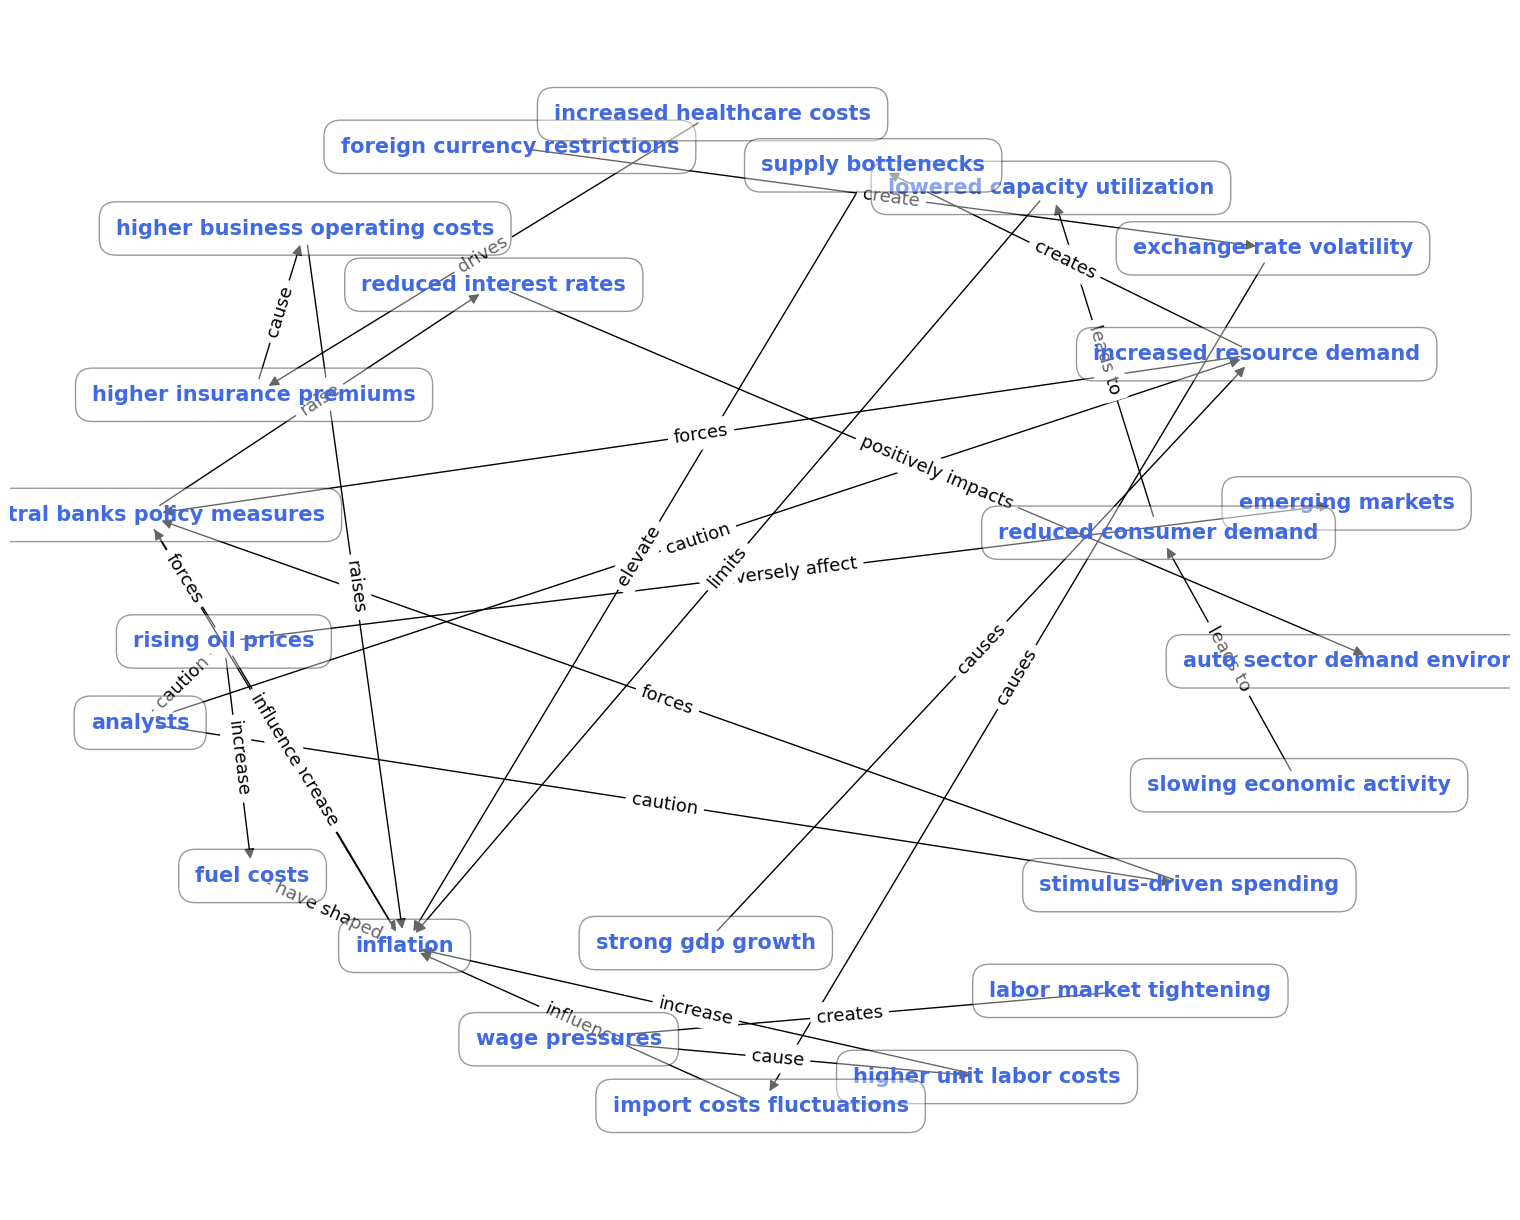

In [11]:
#new (DAG Implementation)
#without duplicates
dagCauseTriples = []
cg = nx.DiGraph()
dagCauseSents = []
dagCauseVerbs = []

for ce,se in zip(causeffect,causalSentences):
    s = str(ce[0])    
    d = str(ce[2])
    #cg.add_node(s,id = str(s),title=str(s),x=615,y=200) #for d3js
    cg.add_node(s,id = str(s),title=str(s),x=615,y=200)
    #cg.add_node(d,id = str(d),title=str(d),x=615,y=200) #for d3js
    cg.add_node(d,id = str(d),title=str(d),x=615,y=200)
    cg.add_edge(s, d, predicade=str(ce[1]))
#     dagCauseTriples.append(ce)
#     dagCauseSents.append(se)
#     dagCauseVerbs.append(str(ce[1]))
    if nx.is_directed_acyclic_graph(cg) is False:
        cg.remove_edge(s, d)
#         dagCauseTriples.remove(ce)
#         dagCauseSents.remove(se)  
#         dagCauseVerbs.remove(str(ce[1]))
    else:
        for dummy,dummy1,dummy2 in zip(dagCauseTriples,dagCauseSents,dagCauseVerbs):
            if str(dummy[0]) == s and str(dummy[2]) == d:
                dagCauseTriples.remove(dummy)
                dagCauseSents.remove(dummy1)  
                dagCauseVerbs.remove(dummy2)
                break;
        dagCauseTriples.append(ce)
        dagCauseSents.append(se)
        dagCauseVerbs.append(str(ce[1]))

print("Nodes:",len(cg.nodes))
print("Edges:",len(cg.edges))
for e in cg.edges(data=True):
    print(e[0],",",e[2],",",e[1])

pos = nx.spring_layout(cg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cg,'predicade')
nx.draw_networkx_edge_labels(cg, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

In [12]:
dagCauseTriples

[('reduced interest rates',
  'positively impacts',
  'auto sector demand environment'),
 ('rising oil prices', 'adversely affect', 'emerging markets'),
 ('rising oil prices', 'increase', 'fuel costs'),
 ('fuel costs', 'have shaped', 'inflation'),
 ('rising oil prices', 'increase', 'inflation'),
 ('central banks policy measures', 'influence', 'inflation'),
 ('labor market tightening', 'creates', 'wage pressures'),
 ('wage pressures', 'cause', 'higher unit labor costs'),
 ('higher unit labor costs', 'increase', 'inflation'),
 ('foreign currency restrictions', 'create', 'exchange rate volatility'),
 ('exchange rate volatility', 'causes', 'import costs fluctuations'),
 ('import costs fluctuations', 'influence', 'inflation'),
 ('increased healthcare costs', 'drives', 'higher insurance premiums'),
 ('higher insurance premiums', 'cause', 'higher business operating costs'),
 ('higher business operating costs', 'raises', 'inflation'),
 ('slowing economic activity', 'leads to', 'reduced consume

In [13]:
dagCauseSents

['reduced interest rates positively impacts auto sector demand environment.',
 'rising oil prices adversely affect emerging markets.',
 'rising oil prices increase fuel costs in emerging markets.',
 'fuel costs have shaped inflation.',
 'rising oil prices increase inflation in emerging markets.',
 'central banks policy measures influence inflation.',
 'labor market tightening creates wage pressures.',
 'wage pressures cause higher unit labor costs.',
 'higher unit labor costs increases inflation.',
 'foreign currency restrictions create exchange rate volatility.',
 'exchange rate volatility causes import costs fluctuations.',
 'import costs fluctuations influence inflation.',
 'increased healthcare costs drives higher insurance premiums.',
 'higher insurance premiums cause higher business operating costs.',
 'higher business operating costs raises inflation.',
 'slowing economic activity leads to reduced consumer demand.',
 'reduced consumer demand leads to lowered capacity utilization

In [14]:
for x, y  in zip(dagCauseSents, dagCauseTriples):
    print(x, y)

reduced interest rates positively impacts auto sector demand environment. ('reduced interest rates', 'positively impacts', 'auto sector demand environment')
rising oil prices adversely affect emerging markets. ('rising oil prices', 'adversely affect', 'emerging markets')
rising oil prices increase fuel costs in emerging markets. ('rising oil prices', 'increase', 'fuel costs')
fuel costs have shaped inflation. ('fuel costs', 'have shaped', 'inflation')
rising oil prices increase inflation in emerging markets. ('rising oil prices', 'increase', 'inflation')
central banks policy measures influence inflation. ('central banks policy measures', 'influence', 'inflation')
labor market tightening creates wage pressures. ('labor market tightening', 'creates', 'wage pressures')
wage pressures cause higher unit labor costs. ('wage pressures', 'cause', 'higher unit labor costs')
higher unit labor costs increases inflation. ('higher unit labor costs', 'increase', 'inflation')
foreign currency restric

In [15]:
#nt = Network("500px", "1000px", notebook=True,directed=True, bgcolor='#ffffff', font_color='black', layout=None, heading='Causal Graph')
nt = Network("660px", "1515px", notebook=True,directed=True, bgcolor='#ffffff', font_color='black', layout=None, heading='Causal Graph')

for dm in dagCauseTriples:
    #color = "#ffffff"
    nt.add_node(str(dm[0]),shape = 'box',physics='false',color = "#ffffff")
    nt.add_node(str(dm[2]),shape = 'box',physics='false',color = "#ffffff")
    nt.add_edge(str(dm[0]),str(dm[2]),label=str(dm[1]), weight=10, physics='false',color='black')

#nt.show_buttons(filter_=['physics'])
nt.set_edge_smooth('discrete')
nt.show("./Pyvis Graph/Causal Graph.html")

In [16]:
def Allen_sents_SentLevel(causalSentences):
    allen = []
    for sent in causalSentences:
        encoded_input = tokenizer(str(sent), return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        if scores[0] > scores[1] and scores[0] > scores[2]:
            score = scores[0] * -1
            score = round(score,3)
            allen.append(score)
            # allen.append(-1)
        elif scores[2] > scores[1] and scores[2] > scores[0]:
            scores[2] = round(scores[2],3)
            allen.append(scores[2])
            # allen.append(1)
        else:
            # allen.append(scores[1])
            allen.append(0)
    return allen

In [17]:
def Afinn_sents_SentLevel(causalSentences):
    afinn = []
    for sent in causalSentences:
        #print(sent)
        score = afn.score(str(sent))
        #print(score)
        if score < -5:
            score = -5
        elif score > 5:
            score = 5
        score = score/5
        score = round(score,3)
        afinn.append(score)
    return afinn

In [18]:
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    #print(vs)
    return vs['compound']

def Vader_sents_SentLevel(causalSentences):
    vader = []
    for sent in causalSentences:
        #print(sent)
        #vaderTup = []
        compound = vadersentimentanalysis(str(sent))
        compound = round(compound,3)
        vader.append(compound)
    return vader

In [19]:
def Senti_sents_SentLevel(causalSentences):
    sentiStrength = []
    for sent in causalSentences:
        #print(sent)
        result = senti.getSentiment(str(sent), score='scale')
        #print(result)
        result = result[0]/4
        result = round(result,3)
        sentiStrength.append(result)
    return sentiStrength

In [20]:
allen = Allen_sents_SentLevel(dagCauseSents)
afinn = Afinn_sents_SentLevel(dagCauseSents)
vader = Vader_sents_SentLevel(dagCauseSents)
sentiStrength = Senti_sents_SentLevel(dagCauseSents)

df_CSW = pd.DataFrame(list(zip(dagCauseSents, allen, afinn, vader,sentiStrength)), columns =['Causal Sentence', 'HuggingFace','Afinn','Vader','SentiStrength'])

df_CSW["Weight"] = df_CSW.sum(axis=1)

for i in df_CSW.index:
    count = 0
#     print(df2["Afinn"][i])
    if df_CSW["HuggingFace"][i] != 0:
        count = count + 1
    if df_CSW["Afinn"][i] != 0:
        count = count + 1
    if df_CSW["Vader"][i] != 0:
        count = count + 1
    if df_CSW["SentiStrength"][i] != 0:
        count = count + 1
    if count == 0:
        count = 1
    df_CSW["Weight"][i] = round(df_CSW["Weight"][i]/count,3)

sentPolarity = []
sentsWeight_sentLevel = []

for index, row in df_CSW.iterrows():
    sentWeightTuple = []
    weight = row['Weight']
    sentWeightTuple.append(weight)
    sentsWeight_sentLevel.append(sentWeightTuple)
    #print(weight)
    if weight >= -1 and weight < -0.6:
        sentPolarity.append('Strong Negative') 
    elif weight >= -0.6 and weight < -0.3:
        sentPolarity.append('Moderate Negative')
    elif weight >= -0.3 and weight < 0:
        sentPolarity.append('Weak Negative')
    elif weight == 0:
        sentPolarity.append('Neutral')
    elif weight <= 1 and weight > 0.6:
        sentPolarity.append('Strong Positive')
    elif weight <= 0.6 and weight > 0.3:
        sentPolarity.append('Moderate Positive')
    elif weight <= 0.3 and weight > 0:
        sentPolarity.append('Weak Positive')

df_CSW["Polarity"] = sentPolarity
df_CSW.style

c:\Users\sjsheikh\AppData\Local\anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
c:\Users\sjsheikh\AppData\Local\anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Causal Sentence,HuggingFace,Afinn,Vader,SentiStrength,Weight,Polarity
0,reduced interest rates positively impacts auto sector demand environment.,0.652000,0.400000,0.710000,0.500000,0.566000,Moderate Positive
1,rising oil prices adversely affect emerging markets.,-0.860000,0.000000,-0.202000,-0.250000,-0.437000,Moderate Negative
2,rising oil prices increase fuel costs in emerging markets.,0.000000,0.200000,0.318000,0.000000,0.259000,Weak Positive
3,fuel costs have shaped inflation.,-0.455000,0.000000,0.000000,-0.250000,-0.353000,Moderate Negative
4,rising oil prices increase inflation in emerging markets.,0.000000,0.200000,0.318000,-0.250000,0.089000,Weak Positive
5,central banks policy measures influence inflation.,0.000000,0.000000,0.000000,-0.250000,-0.250000,Weak Negative
6,labor market tightening creates wage pressures.,-0.673000,0.000000,-0.052000,-0.250000,-0.325000,Moderate Negative
7,wage pressures cause higher unit labor costs.,-0.587000,0.000000,-0.318000,-0.250000,-0.385000,Moderate Negative
8,higher unit labor costs increases inflation.,0.000000,0.000000,0.000000,-0.250000,-0.250000,Weak Negative
9,foreign currency restrictions create exchange rate volatility.,-0.702000,0.000000,0.273000,-0.250000,-0.226000,Weak Negative


In [21]:
weights = df_CSW["Weight"].tolist()
polarities = df_CSW["Polarity"].tolist()
print(weights)
print(polarities)
bench_check = False

def GetPolarity(weight):
    if weight >= -1 and weight < -0.6:
        return 'Strong Negative' 
    elif weight >= -0.6 and weight < -0.3:
        return 'Moderate Negative'
    elif weight >= -0.3 and weight < 0:
        return 'Weak Negative'
    elif weight == 0:
        return 'Neutral'
    elif weight <= 1 and weight > 0.6:
        return 'Strong Positive'
    elif weight <= 0.6 and weight > 0.3:
        return 'Moderate Positive'
    elif weight <= 0.3 and weight > 0:
        return 'Weak Positive'

[0.566, -0.437, 0.259, -0.353, 0.089, -0.25, -0.325, -0.385, -0.25, -0.226, -0.39, -0.25, 0.237, 0.0, -0.25, -0.259, -0.381, -0.288, 0.779, -0.158, -0.25, 0.153, 0.0, -0.499, 0.153, 0.0, 0.0, 0.303]
['Moderate Positive', 'Moderate Negative', 'Weak Positive', 'Moderate Negative', 'Weak Positive', 'Weak Negative', 'Moderate Negative', 'Moderate Negative', 'Weak Negative', 'Weak Negative', 'Moderate Negative', 'Weak Negative', 'Weak Positive', 'Neutral', 'Weak Negative', 'Weak Negative', 'Moderate Negative', 'Weak Negative', 'Strong Positive', 'Weak Negative', 'Weak Negative', 'Weak Positive', 'Neutral', 'Moderate Negative', 'Weak Positive', 'Neutral', 'Neutral', 'Moderate Positive']


Nodes: 24
Edges: 28
reduced interest rates , {'predicate': 'Moderate Positive'} , auto sector demand environment
rising oil prices , {'predicate': 'Moderate Negative'} , emerging markets
rising oil prices , {'predicate': 'Weak Positive'} , fuel costs
rising oil prices , {'predicate': 'Weak Positive'} , inflation
rising oil prices , {'predicate': 'Neutral'} , central banks policy measures
fuel costs , {'predicate': 'Moderate Negative'} , inflation
central banks policy measures , {'predicate': 'Weak Negative'} , inflation
central banks policy measures , {'predicate': 'Moderate Positive'} , reduced interest rates
labor market tightening , {'predicate': 'Moderate Negative'} , wage pressures
wage pressures , {'predicate': 'Moderate Negative'} , higher unit labor costs
higher unit labor costs , {'predicate': 'Weak Negative'} , inflation
foreign currency restrictions , {'predicate': 'Weak Negative'} , exchange rate volatility
exchange rate volatility , {'predicate': 'Moderate Negative'} , imp

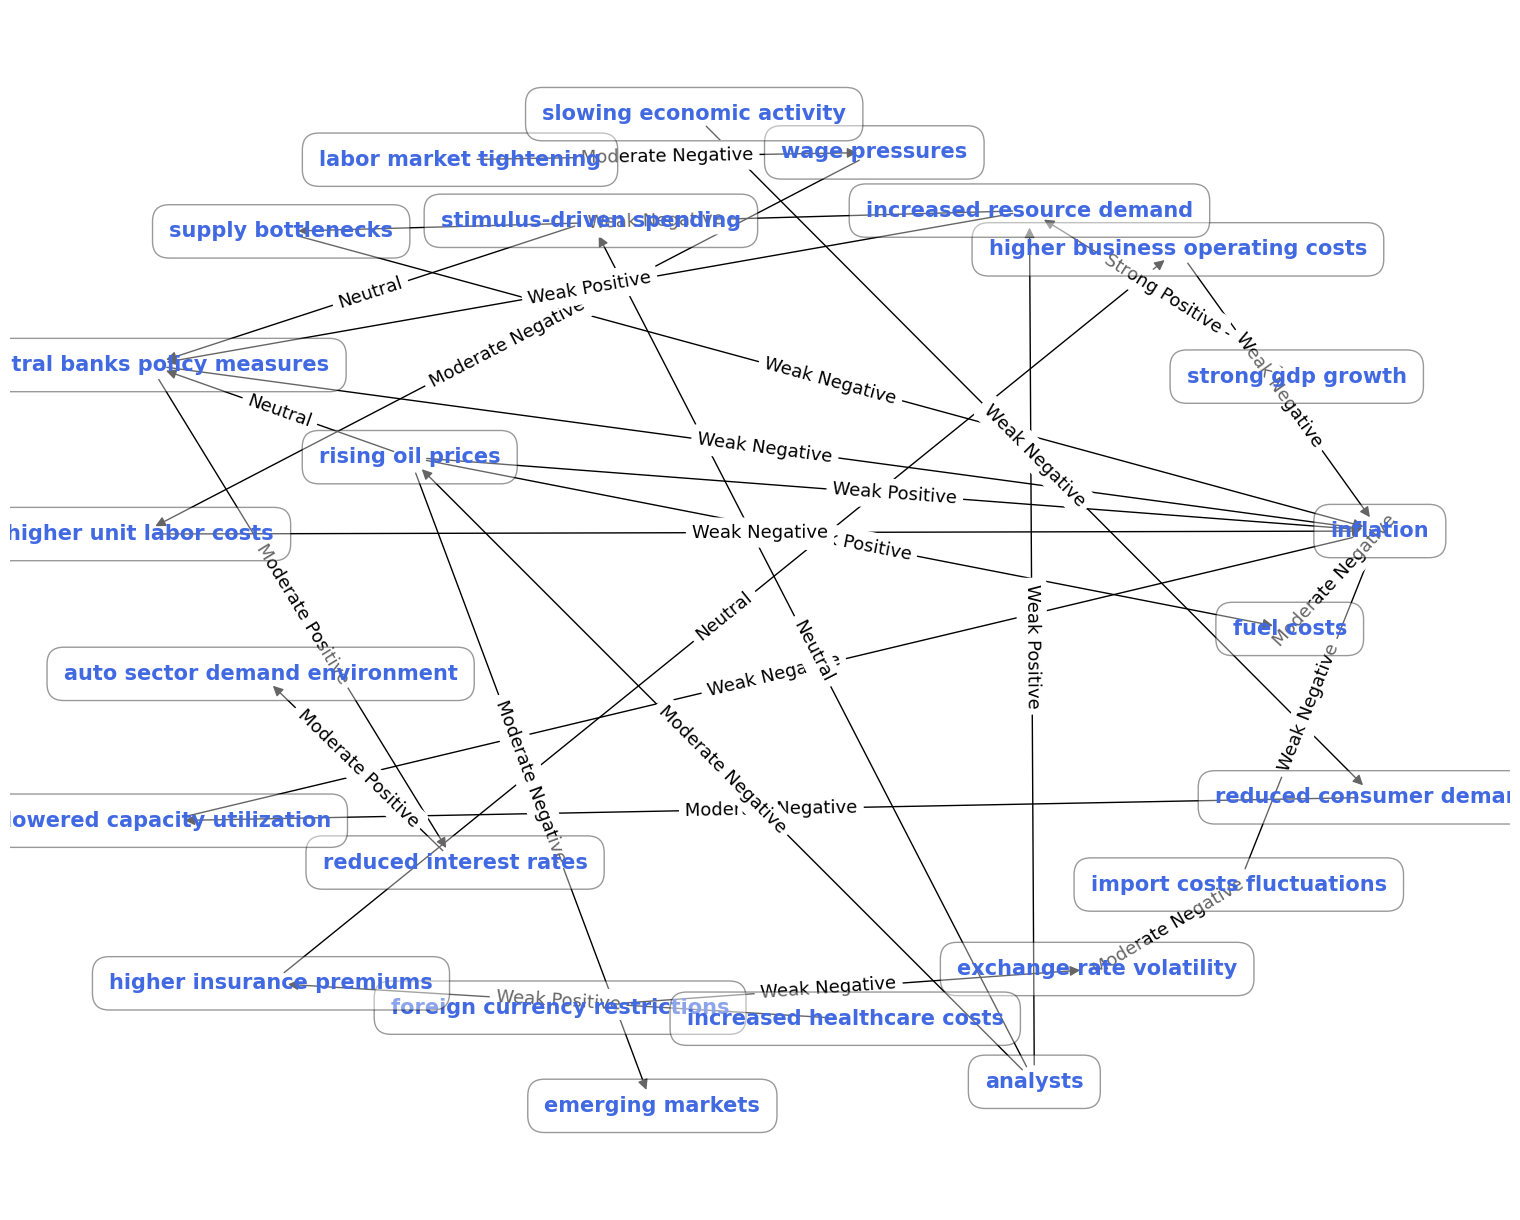

In [22]:
# dagCauseWeights = []
cwg = nx.DiGraph()

for ce,p in zip(dagCauseTriples, polarities):
    s = str(ce[0])    
    d = str(ce[2])
#     w = GetCAstLogicStrength(p[0])
    cwg.add_node(s,id = str(s),title=str(s),x=615,y=200)
    cwg.add_node(d,id = str(d),title=str(d),x=615,y=200)
    cwg.add_edge(s, d, predicate=p)
    
print("Nodes:",len(cwg.nodes))
print("Edges:",len(cwg.edges))

for e in cwg.edges(data=True):
    print(e[0],",",e[2],",",e[1])
    

pos = nx.spring_layout(cwg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cwg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cwg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cwg,'predicate')
#edge_labels2 = nx.get_edge_attributes(cwg,'polarity')
#edge_labels = nx.get_edge_attributes(cwg,'weight')

nx.draw_networkx_edge_labels(cwg, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

In [23]:
nt = Network("660px", "1515px", notebook=True,directed=True, bgcolor='#ffffff', font_color='black', layout=None, heading='Polarized Causal Graph')

for dm,w in zip(dagCauseTriples, weights):
    nt.add_node(str(dm[0]),shape = 'box',physics='false',color = "#ffffff")
    nt.add_node(str(dm[2]),shape = 'box',physics='false',color = "#ffffff")
    p = GetPolarity(w)
    nt.add_edge(str(dm[0]),str(dm[2]),label=str(w), weight=10, physics='false',color='black')
    #nt.add_edge(str(dm[0]),str(dm[2]),label="h = "+str(w), weight=10, physics='false',color='black') #only add h vaules on edges

#nt.show_buttons(filter_=['physics'])
nt.set_edge_smooth('discrete')
nt.show("./Pyvis Graph/Polarized Causal Graph.html")

In [24]:
def FromTruthTable(i,inputs):
    count = 0

    if inputs==1:
        for a in range(1, -1, -1):
            if i == count:
                return (a)
            count = count+1

    if inputs==2:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                if i == count:
                    t = (a,b)
                    return t
                count = count+1
        
    elif inputs==3:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    if i == count:
                        t = (a,b,c)
                        return t
                    count = count+1
    
    elif inputs==4:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        if i == count:
                            t = (a,b,c,d)
                            return t
                        count = count+1

    elif inputs==5:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        for e in range(1,-1,-1):
                            if i == count:
                                t = (a,b,c,d,e)
                                return t
                            count = count+1
                            
    elif inputs==6:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        for e in range(1,-1,-1):
                            for f in range(1,-1,-1):
                                if i == count:
                                    t = (a,b,c,d,e,f)
                                    return t
                                count = count+1

    elif inputs==7:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        for e in range(1,-1,-1):
                            for f in range(1,-1,-1):
                                for g in range(1,-1,-1):
                                    if i == count:
                                        t = (a,b,c,d,e,f,g)
                                        return t
                                    count = count+1

    elif inputs==8:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        for e in range(1,-1,-1):
                            for f in range(1,-1,-1):
                                for g in range(1,-1,-1):
                                    for h in range(1,-1,-1):
                                        if i == count:
                                            t = (a,b,c,d,e,f,g,h)
                                            return t
                                        count = count+1

    elif inputs==9:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        for e in range(1,-1,-1):
                            for f in range(1,-1,-1):
                                for g in range(1,-1,-1):
                                    for h in range(1,-1,-1):
                                        for j in range(1,-1,-1):
                                            if i == count:
                                                t = (a,b,c,d,e,f,g,h,j)
                                                return t
                                            count = count+1

    elif inputs==10:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        for e in range(1,-1,-1):
                            for f in range(1,-1,-1):
                                for g in range(1,-1,-1):
                                    for h in range(1,-1,-1):
                                        for j in range(1,-1,-1):
                                            for k in range(1,-1,-1):
                                                if i == count:
                                                    t = (a,b,c,d,e,f,g,h,j,k)
                                                    return t
                                                count = count+1

    elif inputs==11:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        for e in range(1,-1,-1):
                            for f in range(1,-1,-1):
                                for g in range(1,-1,-1):
                                    for h in range(1,-1,-1):
                                        for j in range(1,-1,-1):
                                            for k in range(1,-1,-1):
                                                for l in range(1,-1,-1):
                                                    if i == count:
                                                        t = (a,b,c,d,e,f,g,h,j,k,l)
                                                        return t
                                                    count = count+1

    elif inputs==12:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        for e in range(1,-1,-1):
                            for f in range(1,-1,-1):
                                for g in range(1,-1,-1):
                                    for h in range(1,-1,-1):
                                        for j in range(1,-1,-1):
                                            for k in range(1,-1,-1):
                                                for l in range(1,-1,-1):
                                                    for m in range(1,-1,-1):
                                                        if i == count:
                                                            t = (a,b,c,d,e,f,g,h,j,k,l,m)
                                                            return t
                                                        count = count+1

    elif inputs==13:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        for e in range(1,-1,-1):
                            for f in range(1,-1,-1):
                                for g in range(1,-1,-1):
                                    for h in range(1,-1,-1):
                                        for j in range(1,-1,-1):
                                            for k in range(1,-1,-1):
                                                for l in range(1,-1,-1):
                                                    for m in range(1,-1,-1):
                                                        for n in range(1,-1,-1):
                                                            if i == count:
                                                                t = (a,b,c,d,e,f,g,h,j,k,l,m,n)
                                                                return t
                                                            count = count+1

    elif inputs==14:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        for e in range(1,-1,-1):
                            for f in range(1,-1,-1):
                                for g in range(1,-1,-1):
                                    for h in range(1,-1,-1):
                                        for j in range(1,-1,-1):
                                            for k in range(1,-1,-1):
                                                for l in range(1,-1,-1):
                                                    for m in range(1,-1,-1):
                                                        for n in range(1,-1,-1):
                                                            for o in range(1,-1,-1):
                                                                if i == count:
                                                                    t = (a,b,c,d,e,f,g,h,j,k,l,m,n,o)
                                                                    return t
                                                                count = count+1                                                                                                                                                                                                            

def GetCAstLogicStrength(polarity):
    if polarity == "Strong Negative":
        return -0.9
    elif polarity == "Moderate Negative":
        return -0.6
    elif polarity == "Mild Negative":
        return -0.6
    elif polarity == "Weak Negative":
        return -0.3
    elif polarity == "Neutral":
        return 0.1
    elif polarity == "Weak Positive":
        return 0.3
    elif polarity == "Mild Positive":
        return 0.6
    elif polarity == "Moderate Positive":
        return 0.6
    elif polarity == "Strong Positive":
        return 0.9                                

class Tutorial1:
    #def __init__(self):
    def Add(self, net, id ,name, outcomes, x_pos, y_pos):
        e = self.create_cpt_node(net, id, name, outcomes, x_pos, y_pos)
        nodeNames.append(net.get_node_name(e))
        nodeIds.append(net.get_node_id(e))
        nodeHandles.append(e)
        net.write_file("./GeNie CBN/CBN.xdsl")
        
    def AddArcs(self, net, s, d):
        net.add_arc(s, d)
        net.write_file("./GeNie CBN/CBN.xdsl")

    def Addcpts(self, net, h, cpt):
        net. set_node_definition(h, cpt)
        net.write_file("./GeNie CBN/CBN.xdsl")
        
    def create_cpt_node(self, net, id, name, outcomes, x_pos, y_pos):
        handle = net.add_node(pysmile.NodeType.CPT, id)
        net.set_node_name(handle, name)
        net.set_node_position(handle, x_pos, y_pos, 85, 55)
        initial_outcome_count = net.get_outcome_count(handle)
        for i in range(0, initial_outcome_count):
            net.set_outcome_id(handle, i, outcomes[i])
        for i in range(initial_outcome_count, len(outcomes)):
            net.add_outcome(handle, outcomes[i])
        return handle
    
    def print_cpt_matrix(self, net, node_handle):
        cpt = net.get_node_definition(node_handle)
        return cpt
    

net = pysmile.Network()
obj = Tutorial1()
outcomes = ["True","False"]
nodeNames = []    
nodeIds = []
nodeHandles = []
# cpts=[]
PDs = []
baseline = 0.1
x = 160
y = 40

for node in cwg.nodes: 
    obj.Add(net, str(node),str(node), outcomes, x, y)
        
for e in cwg.edges():
    for id,name in zip(nodeIds,nodeNames):
        if name == e[0]:
            s = id
        if name == e[1]:
            d = id 
    obj.AddArcs(net, s, d)
    
for handle,name in zip(nodeHandles,nodeNames): 
    print("Handle:" + str(handle))
    print("Node:" + name)
    print(net.get_outcome_ids(handle))
    parent_ids = net.get_parent_ids(handle)
    num_parents = len(parent_ids)
    print("Number of Parents:" + str(num_parents))
    cpt = []
    parent_names = []
    totalCols = 1
    if num_parents == 0:
        cpt.append(baseline)
        cpt.append(1 - baseline)
        print("CPT:" + str(cpt))
        obj.Addcpts(net, handle, cpt)
        print("CPT from Network:")
        print(obj.print_cpt_matrix(net, handle))
        print("********************************************************************")
    elif num_parents > 0:
        for par in parent_ids:
                parent_names.append(net.get_node_name(par))
                totalCols = 2 ** num_parents
        print("Names of Parents:" + str(parent_names))
        print("totalCols:" + str(totalCols))
        for j in range(0, totalCols):
            print("j: "+str(j))
            PI = 1
            NI = 1
            ans = FromTruthTable(j,num_parents)
            print("From Dummy: "+str(ans))
            #for parent in parent_names:
            for p in range(0,len(parent_names)):
                for edge in cwg.edges(data=True):
                    if str(parent_names[p]) == str(edge[0]) and str(name) == str(edge[1]):
                        for nbr, eattr in edge[2].items():
                            if nbr == "predicate":
                                #polarity = eattr
                                polarity = GetCAstLogicStrength(eattr)
                        break
                print("Parent: " + parent_names[p])
                print("Polarity: " + str(polarity))
                print("p: "+str(p))
                if num_parents > 1:
                    if ans[p] == 0:
                        polarity = 0
                        print("New Polarity: " + str(polarity))
                else:
                    if ans == 0:
                        polarity = 0
                        print("New Polarity: " + str(polarity))
                if polarity >= 0:
                    #polarity = polarity/4
                    PI = PI * (1 - polarity)
                else:
                    #polarity = polarity/ (-4)
                    NI = NI * (1 - abs(polarity))
            PI = 1 - PI
            NI = 1 - NI
            AI = abs(PI - NI) / (1 - min(PI, NI))  
            CP = 0
            if PI > NI:
                CP = baseline + ((1 - baseline) * AI)
            elif PI < NI:
                CP = baseline - (baseline * AI)
            elif PI == NI:
                CP = baseline
            if CP == 0:
                CP = 0.01
            cpt.append(round(CP, 3))
            cpt.append(round((1 - CP), 3))
            pds = []
            pds.append(round(CP, 3))
            pds.append(round((1 - CP), 3))
            PDs.append(pds)
        print("CPT:" + str(cpt))
        obj.Addcpts(net, handle, cpt)
        print("CPT from Network:")
        print(obj.print_cpt_matrix(net, handle))
        print("********************************************************************")

Handle:0
Node:reduced interest rates
['True', 'False']
Number of Parents:1
Names of Parents:['central banks policy measures']
totalCols:2
j: 0
From Dummy: 1
Parent: central banks policy measures
Polarity: 0.6
p: 0
j: 1
From Dummy: 0
Parent: central banks policy measures
Polarity: 0.6
p: 0
New Polarity: 0
CPT:[0.64, 0.36, 0.1, 0.9]
CPT from Network:
[0.64, 0.36, 0.1, 0.9]
********************************************************************
Handle:1
Node:auto sector demand environment
['True', 'False']
Number of Parents:1
Names of Parents:['reduced interest rates']
totalCols:2
j: 0
From Dummy: 1
Parent: reduced interest rates
Polarity: 0.6
p: 0
j: 1
From Dummy: 0
Parent: reduced interest rates
Polarity: 0.6
p: 0
New Polarity: 0
CPT:[0.64, 0.36, 0.1, 0.9]
CPT from Network:
[0.64, 0.36, 0.1, 0.9]
********************************************************************
Handle:2
Node:rising oil prices
['True', 'False']
Number of Parents:1
Names of Parents:['analysts']
totalCols:2
j: 0
From Dummy